In [1]:
import numpy as np

n = 180
d = 220

x = np.random.randn(180, 220)

x_tilde = np.hstack([x, np.ones((180, 1))] )

# we consider 7 groups where each group has 40 attributes
groupSize = 7
attrSize = 40
g = np.zeros((groupSize,attrSize))
for i in np.arange(7):
    g[i] = np.arange(30*i, 30*i+attrSize)

g = g.astype('int64')
# we consider feature in group 0, 1,  2 is activated.
arr1 = np.random.randn(100, 1)
w = np.vstack([20*arr1, np.zeros((120, 1)), 5*np.random.rand()]) 

noise = 0.5

y = np.dot(x_tilde, w) + noise*np.random.randn(180, 1)

In [2]:
import cvxpy as cv
import matplotlib.pyplot as plt

def mldivide(A, b):
    piA = np.linalg.pinv(A)
    x = np.dot(piA, b)
    return x

def group_lasso(X, Y, lam=1.0 ):
    west = cv.Variable((d+1,1))
    obj_fn = \
        0.5/n * cv.quad_form(X @ west - Y, np.eye(X.shape[0])) + \
        lam * (cv.norm(west[g[0]], 2.0) + \
             cv.norm(west[g[1]], 2.0) + \
             cv.norm(west[g[2]], 2.0) + \
             cv.norm(west[g[3]], 2.0) + \
             cv.norm(west[g[4]], 2.0) + \
             cv.norm(west[g[5]], 2.0) + \
             cv.norm(west[g[6]], 2.0))
  
    objective = cv.Minimize(obj_fn)
    constraints = []

    prob = cv.Problem(objective, constraints)
    result = prob.solve(solver=cv.CVXOPT)
    
    return west.value


In [3]:
k = 0
z_k = np.random.randn(180,1)
u_k = np.random.randn(180,1)

while k < 100:
    Rho = 1.618
    lam = 1.0

    #Optimize w_k_next with z_k and u_k
    y_k = y + z_k - u_k
    w_k = group_lasso(x_tilde, y_k, lam/Rho)


    #Optimize z_k_next with w_k_next and u_k
    temp = np.dot(x_tilde, w_k) - y + u_k
    z_k = (Rho/(Rho+1))*temp

    #Optimize u_k_next with w_k_next and z_k_next
    u_k = u_k + Rho*(np.dot(x_tilde, w_k) - z_k - y)


    w_k_last = w_k.copy()
   
    print("the iteration {0}".format(k))
    k += 1


the iteration 0
the iteration 1
the iteration 2
the iteration 3
the iteration 4
the iteration 5
the iteration 6
the iteration 7
the iteration 8
the iteration 9
the iteration 10
the iteration 11
the iteration 12
the iteration 13
the iteration 14
the iteration 15
the iteration 16
the iteration 17
the iteration 18
the iteration 19
the iteration 20
the iteration 21
the iteration 22
the iteration 23
the iteration 24
the iteration 25
the iteration 26
the iteration 27
the iteration 28
the iteration 29
the iteration 30
the iteration 31
the iteration 32
the iteration 33
the iteration 34
the iteration 35
the iteration 36
the iteration 37
the iteration 38
the iteration 39
the iteration 40
the iteration 41
the iteration 42
the iteration 43
the iteration 44
the iteration 45
the iteration 46
the iteration 47
the iteration 48
the iteration 49
the iteration 50
the iteration 51
the iteration 52
the iteration 53
the iteration 54
the iteration 55
the iteration 56
the iteration 57
the iteration 58
the ite

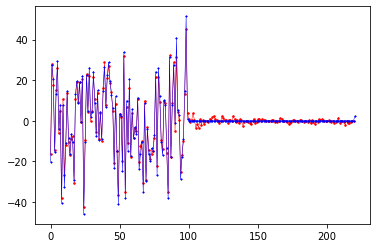

In [4]:
plt.plot(w_k_last[0:d], 'r-o', markersize=1.5, linewidth=0.5)
plt.plot(w, 'b-*', markersize=1.5, linewidth=0.5)